# Trabajo Fin de Estudios - TFE
Master Universitario en Inteligencia Artificial

**Iván Daniel Arévalo Sánchez**
***


## Preparación de dataSets

Importación del DataSet obtenido de Facebook con técnica de Web Scraping.

In [2]:
## Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os   

from sklearn.cluster import KMeans


**PASO 1**

Importación de DataSet, que se ha normalizado previamente desde la la lectura de información de los perfiles



In [3]:
path = 'C:/xampp/htdocs/idarevalos/unir/data/final_data/00_json_result_scraping.json.txt'
data_facebook = pd.read_json(path , orient='values')
data_facebook


,number_friends,followers,job,joined_in,joined_in_since,live,study_actually,flag_study_actually,name,me,friend,name_user_sub,study_finish
0,2359,0,1,2014,7,1,1,1,1,1,1,1,1
1,1,754,1,0,0,0,0,0,1,1,1,1,1
2,1,0,1,0,0,0,0,0,1,1,1,1,1
3,499,0,1,0,0,1,0,0,1,1,1,1,1
4,871,0,1,2014,7,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,4710,0,1,0,0,1,0,0,1,1,1,1,1
270,462,0,1,0,0,1,0,0,1,1,1,1,1
271,2,0,1,2020,1,1,0,0,1,1,1,1,1
272,1,0,1,0,0,0,0,0,1,1,1,1,1


**Eliminando algunas variables que no tendrán uso en la predicción**

In [4]:
data_facebook = data_facebook.drop(['me','friend','name','name_user_sub','study_finish','study_actually','job','joined_in'], axis=1)
data_facebook

,number_friends,followers,joined_in_since,live,flag_study_actually
0,2359,0,7,1,1
1,1,754,0,0,0
2,1,0,0,0,0
3,499,0,0,1,0
4,871,0,7,1,0
...,...,...,...,...,...
269,4710,0,0,1,0
270,462,0,0,1,0
271,2,0,1,1,0
272,1,0,0,0,0


**PASO 2**

Enviarlo a modelo de aprendizaje no supervizado

In [7]:
X = data_facebook
Y = X.to_numpy()

model_kmeans = KMeans(n_clusters=2, random_state=0) # random_state=1,
model_kmeans.fit(Y)
model_kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

** Paso 3 **

Se grafican los resultados de la predición según las variables de entrada   

**Prueba 1**, Se relacionan las variables de Número de Amigos y Seguidores

Text(0.5, 1.0, 'number_friends - joined_in_since')

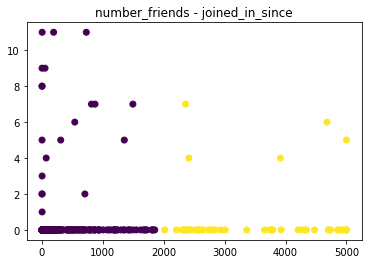

In [8]:
## Graph
prediction = model_kmeans.predict(X)

plt.scatter(Y[:, 0], Y[:, 2], c=prediction)
plt.title('number_friends - joined_in_since')

**Prueba 2**, Se relacionan las variables de Número de Amigos y Desde cuando se ha unido el usuario

Text(0.5, 1.0, 'number_friends - followers')

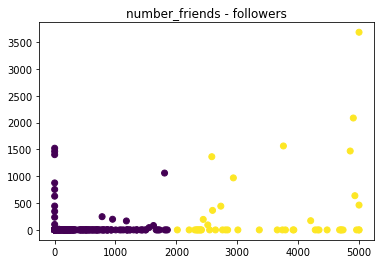

In [9]:
## Graph
plt.scatter(Y[:, 0], Y[:, 1], c=prediction)
plt.title('number_friends - followers')

**Prueba 3**, Se relacionan las variables de Número de Amigos y la variable de identificacion si estudia actualmente

Text(0.5, 1.0, 'number_friends - flag_study_actually')

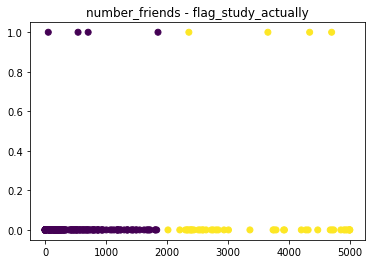

In [10]:

## Graph
plt.scatter(Y[:, 0], Y[:, 4], c=prediction)
plt.title('number_friends - flag_study_actually')

**Prueba 4**, Se relacionan las variables de hace cuanto se unió y la variable de cuando se inicio a Facebook

Text(0.5, 1.0, 'joined_in_since - flag_study_actually')

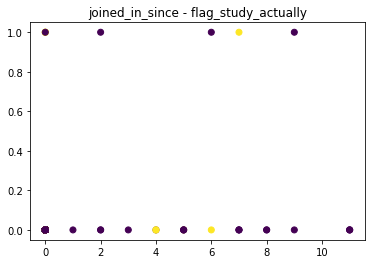

In [11]:

## Graph
plt.scatter(Y[:, 2], Y[:, 4], c=prediction)
plt.title('joined_in_since - flag_study_actually')

** Identificación de perfiles de acuerdo a los datos de entrada **

De acuerdo a las predicciones que genera el modelo de closters, 

De acuerdo a las variables, y en la distribución de los datos, se identifican 2 clases, las cuales se interpretan como un positivo para perfil no válido para Facebook, cuando las características lo clasifican así, y 0 o negativo, cuando sus características no son determinantes, o se identifican con un perfíl válido. 

In [80]:
## CLASES DEFINIDAS
group = ['Posiblemente No válido','Posiblemente Válido']

In [91]:
## Ejemplo de predicción !
## number_friends	followers	joined_in_since	live	flag_study_actually
R = model_kmeans.predict([[100, 10000, 10,   1,   0]])
group[R[0]]

'Postition 3'

** De acuerdo al aprendizaje No supervisado, y la agrupación generada **

se genera el etiquetado de estos datos, para llevarlos a un aprendizaje supervisado, en los siguientes datos que busquen determinarse en el modelo.

In [29]:
data_facebook['clasification'] = 7
data_facebook['name_class'] = ''


cols = ['number_friends', 'followers', 'joined_in', 'joined_in_since','live','flag_study_actually']

 
for i in data_facebook.index:
    array_to_prediction = []
    ## Recorrer las columnas necesrias
    for c in cols:
        array_to_prediction.append(data_facebook[c][i])
    
    ## Hacer la clasificación de acuerdo a los resultados del aprendizaje no supervisado
    r_prediction = model_kmeans.predict([array_to_prediction])

    ## Asignacion en cada fila de la columna prediction    
    data_facebook['clasification'][i] = r_prediction[0]


** Se imprime el nuevo DataSet con datos clasificados**

Le aplica el etiquetado, y posteriormente se lleva a cabo la clasificación para identificar como aprendizaje supervisado.

In [32]:
data_facebook

,number_friends,followers,joined_in,joined_in_since,live,flag_study_actually,clasification
0,2359,0,2014,7,1,1,2
1,1,754,0,0,0,0,0
2,1,0,0,0,0,0,0
3,499,0,0,0,1,0,0
4,871,0,2014,7,1,0,2
...,...,...,...,...,...,...,...
269,4710,0,0,0,1,0,1
270,462,0,0,0,1,0,0
271,2,0,2020,1,1,0,2
272,1,0,0,0,0,0,0


** Haciendo uso de aprendizaje supervizado de acuerdo a la clasificación hecha previamente **

In [690]:
Z = data_facebook.to_numpy()
model_kmeans_supervise = KMeans(n_clusters=2, max_iter=3000, random_state=1)
model_kmeans_supervise.fit(Z)
model_kmeans_supervise.labels_

prediction_z = model_kmeans_supervise.predict(Z)


In [705]:

score = metrics.adjusted_rand_score(Z[:,5], prediction_z) 
print('='*32)
print(" Porcentaje de Presición: " +"{0:.0f} %".format(score*100))
print('='*32)

 Porcentaje de Presición: 100 %


In [723]:
rz = model_kmeans_supervise.predict([[30000, 700,   0,   0,   1, 0]])
print('='*32)
print(" Resultado de un ejemplo de predicción es: " + group[rz[0]])
print('='*32)

 Resultado de un ejemplo de predicción es: No Válido


** Guardar el modelo para usarlo en servicio API **


In [724]:
import pickle

pkl_filename = "00_model_kmeans_supervise.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_kmeans_supervise, file)

** Prueba de uso del modelo guardado **

In [725]:

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
## Generando una prediccion con el archivo guardado

rz_t = pickle_model.predict([[1800, 700,   0,   0,   1, 0]])
print('='*32)
print(" Resultado de un ejemplo de predicción es: " + group[rz_t[0]])
print('='*32)


 Resultado de un ejemplo de predicción es: Válido


In [29]:
print('hola mundo')

hola mundo
